In [44]:
# Loading libraries

import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Load images
images = glob(os.path.join("images","*.png"))

# Load labels
labels = pd.read_csv('sample_labels.csv')

# Observing labels
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


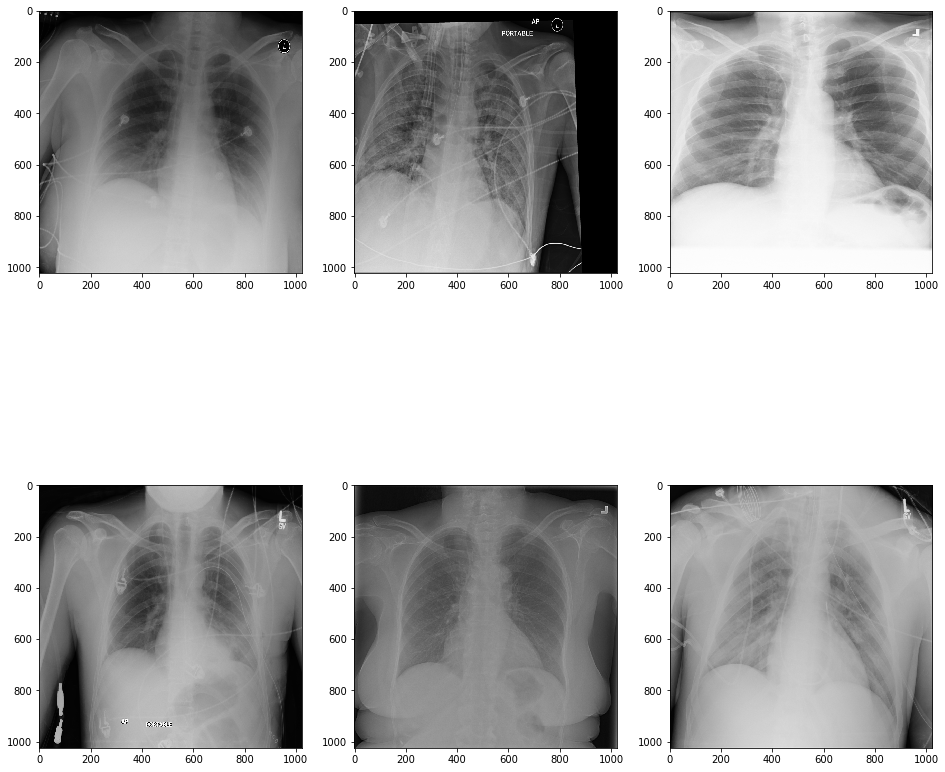

2865    No Finding
Name: Finding Labels, dtype: object
3595    No Finding
Name: Finding Labels, dtype: object
3457    Mass
Name: Finding Labels, dtype: object
1138    No Finding
Name: Finding Labels, dtype: object
5271    Mass|Pleural_Thickening
Name: Finding Labels, dtype: object
1467    No Finding
Name: Finding Labels, dtype: object


In [71]:
# Checking images

r = random.sample(images, 6)

plt.figure(figsize = (16, 16))
plt.subplot(231)
plt.imshow(cv2.imread(r[0]))
plt.subplot(232)
plt.imshow(cv2.imread(r[1]))
plt.subplot(233)
plt.imshow(cv2.imread(r[2]))
plt.subplot(234)
plt.imshow(cv2.imread(r[3]))
plt.subplot(235)
plt.imshow(cv2.imread(r[4]))
plt.subplot(236)
plt.imshow(cv2.imread(r[5]))
plt.show()

print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[0])])
print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[1])])
print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[2])])
print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[3])])
print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[4])])
print(labels["Finding Labels"][labels["Image Index"] == os.path.basename(r[5])])

In [ ]:
# Turning images into arrays and making a list of classes

def proc_images():
    
    x = []
    y = []
    WIDTH = 256
    HEIGHT = 256
    
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH, HEIGHT), ))